In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
url = "https://raw.githubusercontent.com/PacktPublishing/Feature-Engineering-Made-Easy/master/data/pima.data"

In [2]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness',
                     'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv(url, names=pima_column_names)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima['onset_diabetes'].value_counts(normalize=True)

onset_diabetes
0    0.651042
1    0.348958
Name: proportion, dtype: float64

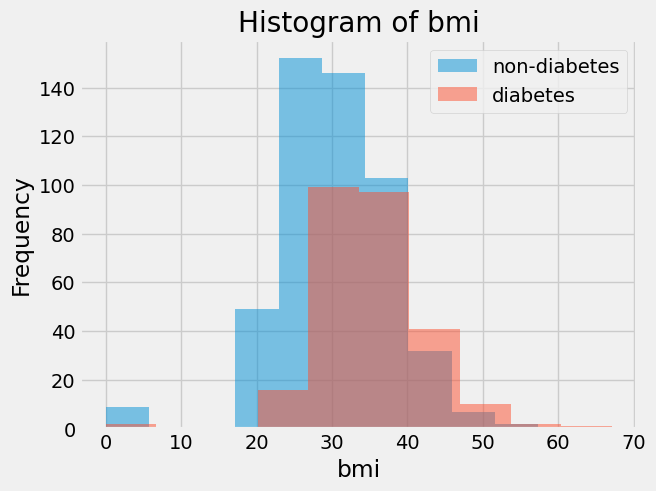

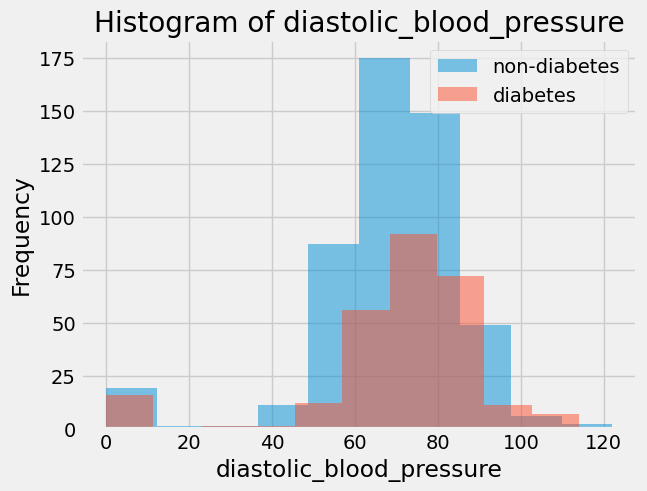

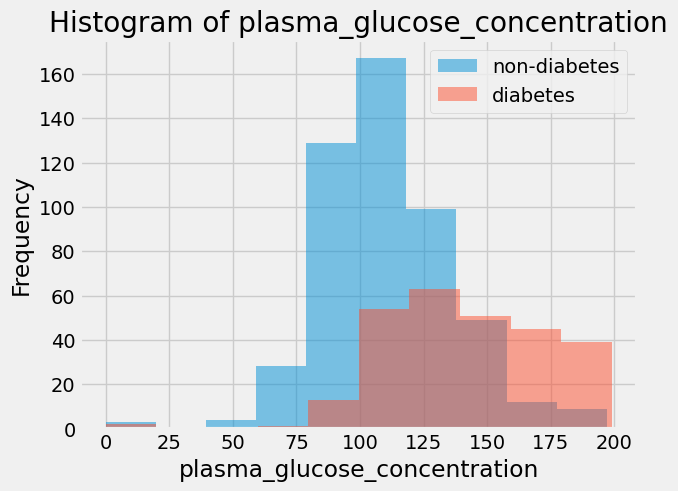

In [4]:
# Ploting different graphs to compare different variables on diabetes vs non-diabetes.
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

<Axes: >

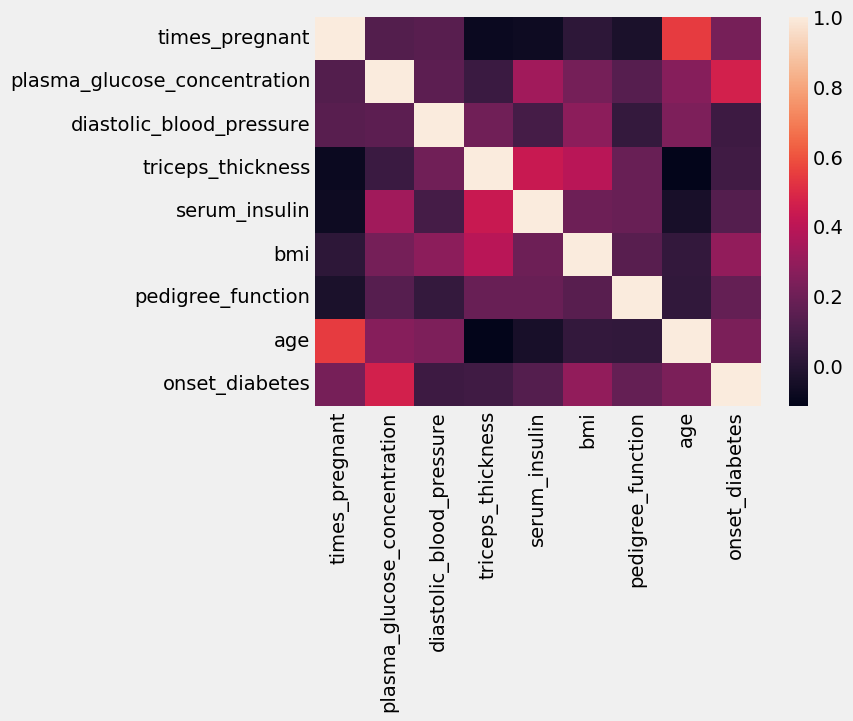

In [5]:
# We see a strong relationship between plasma_glucose_concentration and onset_diabetes.
sns.heatmap(pima.corr())

In [6]:
# We further look into the correlation of onset_diabetes.
pima.corr()['onset_diabetes'].sort_values(ascending=False)

onset_diabetes                  1.000000
plasma_glucose_concentration    0.466581
bmi                             0.292695
age                             0.238356
times_pregnant                  0.221898
pedigree_function               0.173844
serum_insulin                   0.130548
triceps_thickness               0.074752
diastolic_blood_pressure        0.065068
Name: onset_diabetes, dtype: float64

In [7]:
# Check null
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [8]:
pima.shape

(768, 9)

In [9]:
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that other than times_pregnant and onset_diabetes, all columns are imputed with 0s. We need to make it as None for further processing

In [10]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)
pima['serum_insulin'].isnull().sum()

374

# 1. Dropna method

In [11]:
#Bulk processing.
columns = ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 
           'triceps_thickness']
for col in columns:
    pima[col].replace([0], [None], inplace=True)

/tmp/ipykernel_33/3408908589.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pima[col].replace([0], [None], inplace=True)


In [12]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [13]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [14]:
# describe don't include the mean of the row that has None value.
pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


Now we deal with the lost values by dropping them.

In [15]:
pima_dropped = pima.dropna()
num_rows_lost = round(100* (pima.shape[0] - pima_dropped.shape[0]) /  float(pima.shape[0]))
print("retained {}% of rows".format(num_rows_lost))

retained 49% of rows


We dropped nearly 51% of rows, that is half of the data.

In [18]:
pima['onset_diabetes'].value_counts(normalize=True)

onset_diabetes
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [19]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)

onset_diabetes
0    0.668367
1    0.331633
Name: proportion, dtype: float64

No big difference in binary response.

In [20]:
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                 29.15342
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: object

In [21]:
pima_dropped.mean()

times_pregnant                     3.30102
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: object

In [22]:
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insulin                   0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                  -0.04965
dtype: object

Text(0, 0.5, '% change')

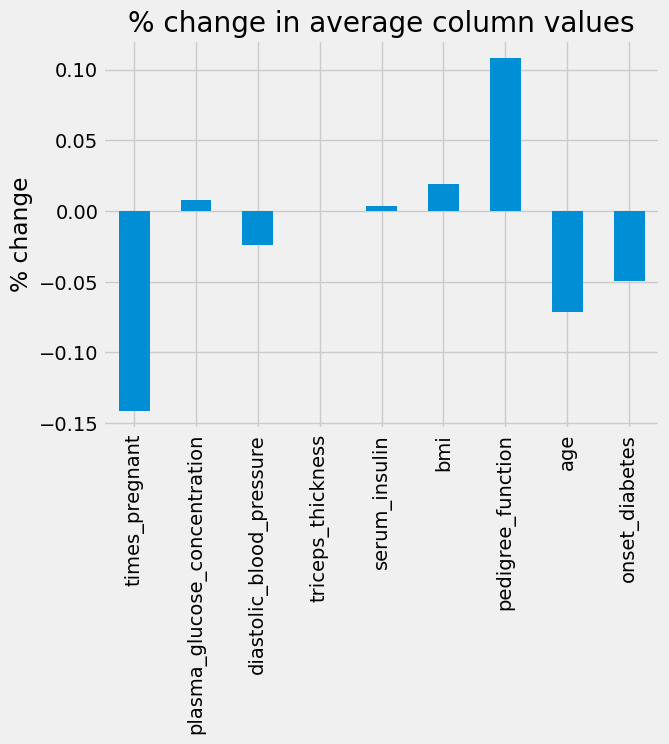

In [25]:
ax = ((pima_dropped.mean() - pima.mean())/ pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

We see that dropna will affect times_pregnant and pedigree_function a lot.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#drop predict target first
X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

# set KNN model parameter
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
# set model
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)
print(grid.best_score_, grid.best_params_)

learning from 392 rows
0.7348263550795197 {'n_neighbors': 7}


# 2. Impute

In [30]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

We get the 5 index in plasma_glucose_concetration and impute it.

In [31]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [32]:
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)

/tmp/ipykernel_33/3105672170.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)


In [33]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [34]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

We can impute like above, but also use scikit-learn preprocessing class

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)

In [37]:
type(pima_imputed)

numpy.ndarray

It is array instead df, we need to convert to df.

In [39]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [40]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [41]:
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [45]:
X_imputed = pima_imputed.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_imputed.shape[0]))
Y_imputed = pima_imputed['onset_diabetes']

knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_imputed, Y_imputed)

print(grid.best_score_, grid.best_params_)

learning from 768 rows
0.7292335115864528 {'n_neighbors': 7}


We can also impute with 0s instead of mean.

In [48]:
pima_zero = pima.fillna(0)
X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {"n_neighbors": [1, 2, 3, 4, 5, 6,7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print(grid.best_score_, grid.best_params_)

/tmp/ipykernel_33/1403852351.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pima_zero = pima.fillna(0)


learning from 768 rows
0.7409387997623291 {'n_neighbors': 7}


It is inappropriate to impute then do splitting. First we split the model to train and test set, and use the train set to impute both train and test set.

In [52]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [53]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)
print(training_mean)

serum_insulin    158.546053
dtype: float64


In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.671875


Now we use pipeline to fit everything to SimpleImputer.

In [62]:
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()
mean_impute = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)
mean_impute = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])

0.7318394024276378 {'classify__n_neighbors': 7}


We can try using median for impute.

In [65]:
knn_params = {'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()
median_impute = Pipeline([('imputer', SimpleImputer(strategy='median')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)
median_impute = Pipeline([('imputer', SimpleImputer(strategy='median')), ('classify', knn)])

0.7292589763177999 {'classify__n_neighbors': 7}


# Standardization and Normalization

array([[<Axes: title={'center': 'times_pregnant'}>,
        <Axes: title={'center': 'plasma_glucose_concentration'}>,
        <Axes: title={'center': 'diastolic_blood_pressure'}>],
       [<Axes: title={'center': 'triceps_thickness'}>,
        <Axes: title={'center': 'serum_insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree_function'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'onset_diabetes'}>]], dtype=object)

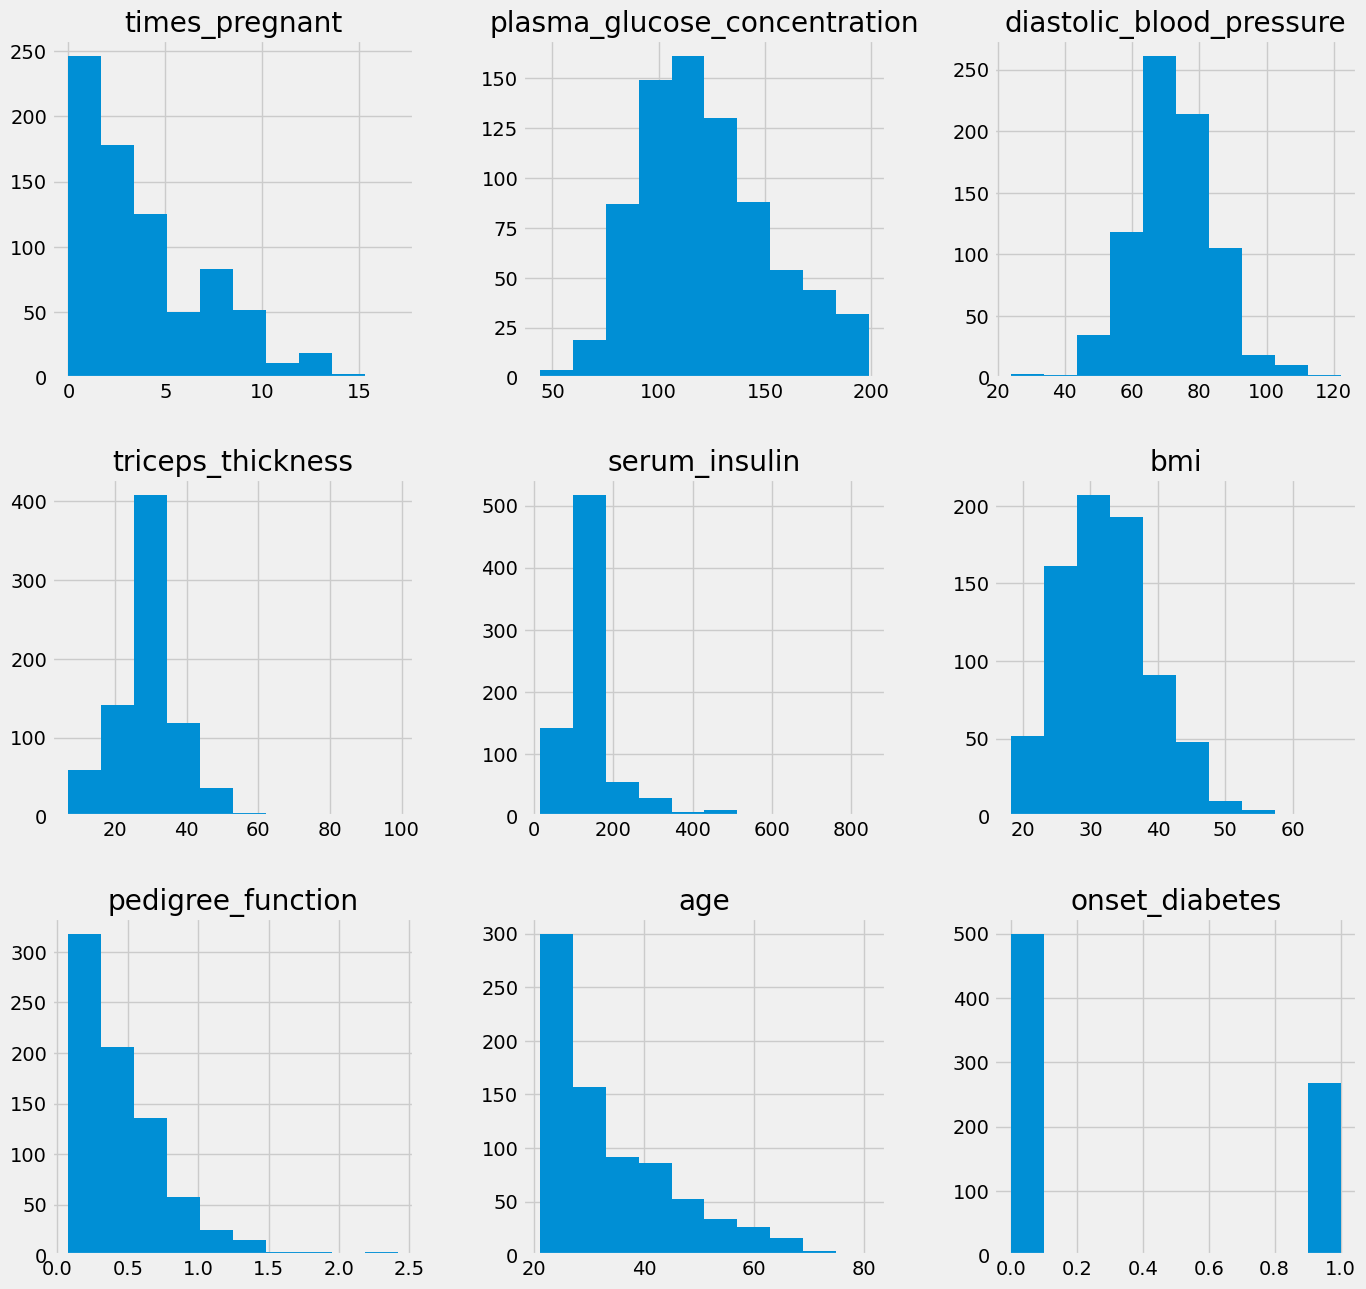

In [68]:
impute = SimpleImputer(strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)
pima_imputed_mean.hist(figsize=(15, 15))

In [69]:
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see a large scale difference in the graph and describe(). So we need to optimize it.

array([[<Axes: title={'center': 'times_pregnant'}>,
        <Axes: title={'center': 'plasma_glucose_concentration'}>,
        <Axes: title={'center': 'diastolic_blood_pressure'}>],
       [<Axes: title={'center': 'triceps_thickness'}>,
        <Axes: title={'center': 'serum_insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree_function'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'onset_diabetes'}>]], dtype=object)

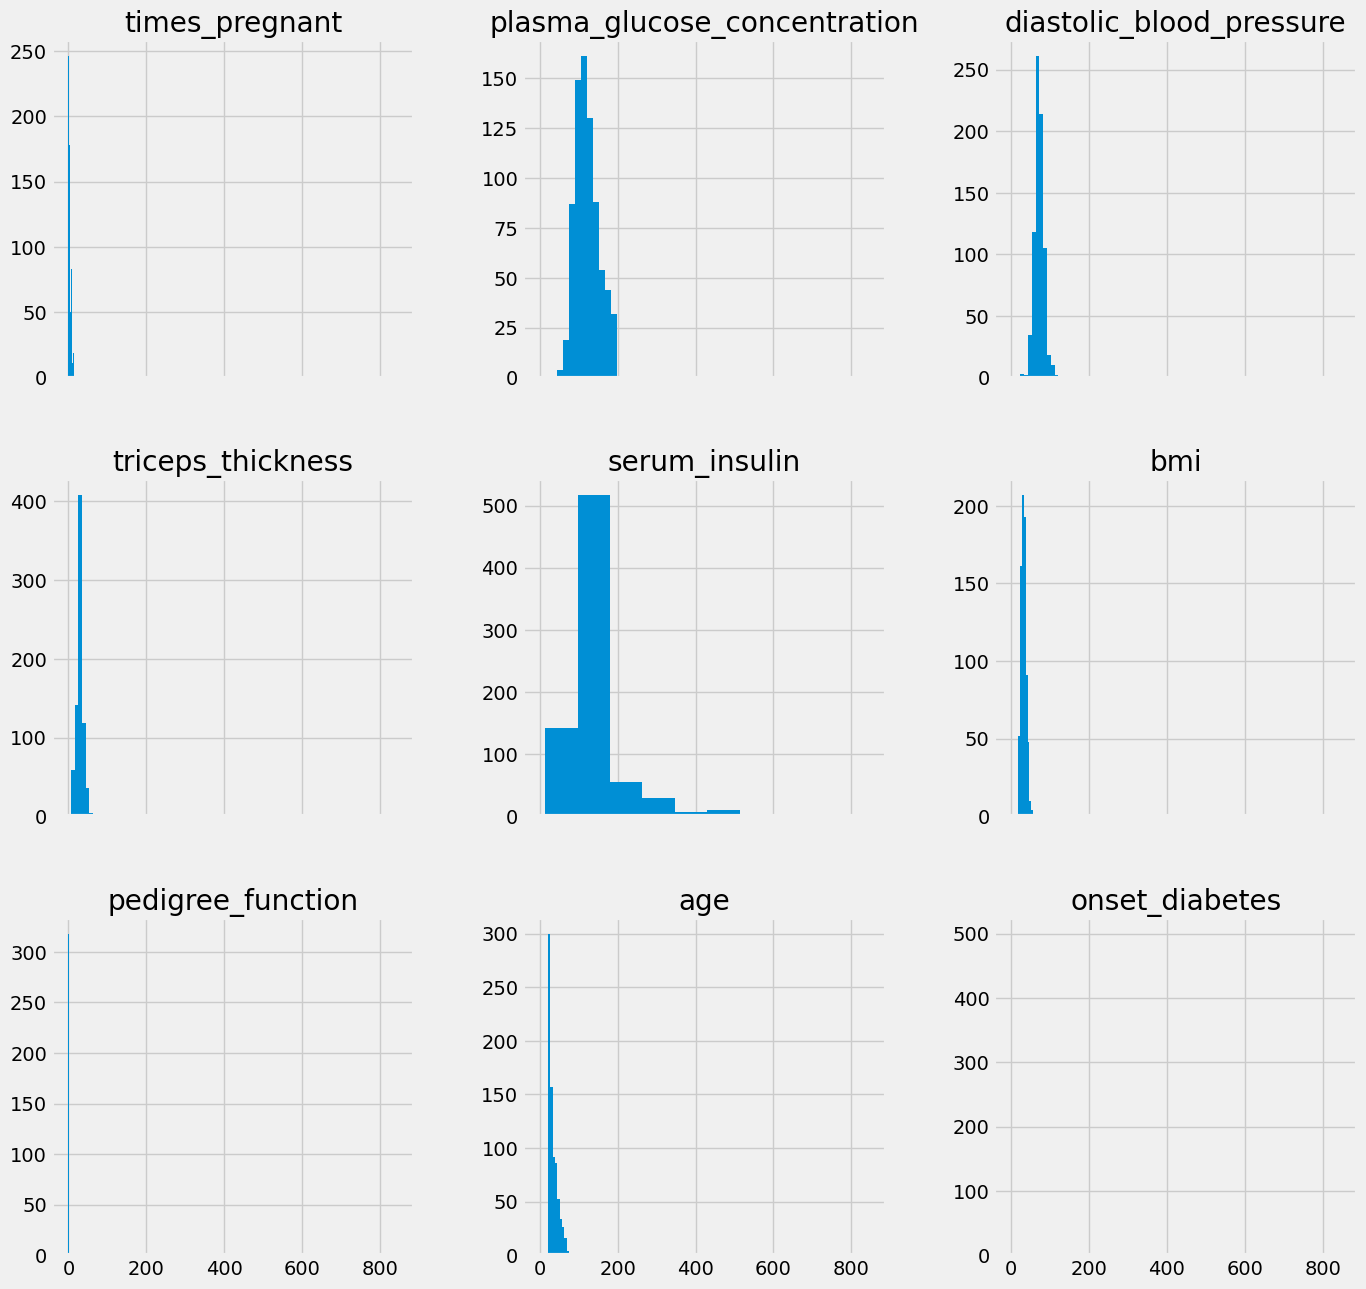

In [70]:
# We use sharex or sharey to let them have same x or y scale.
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)

z = (target - mean)/ std

In [71]:
# mean
mu = pima['plasma_glucose_concentration'].mean()
# sigma
sigma = pima['plasma_glucose_concentration'].std()
# Calculate z score
print(((pima['plasma_glucose_concentration'] - mu) / sigma))

0      0.864545
1     -1.205376
2      2.014501
3     -1.073952
4      0.503130
         ...   
763   -0.679682
764    0.010292
765   -0.022564
766    0.141715
767   -0.942529
Name: plasma_glucose_concentration, Length: 768, dtype: float64


Z-score represent the distance to mean, negative means that the value lower than mean. We can also use scikit-learn lib to do it.

Before scaling

In [72]:
from sklearn.preprocessing import StandardScaler

pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850591, 30.435948867207657)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

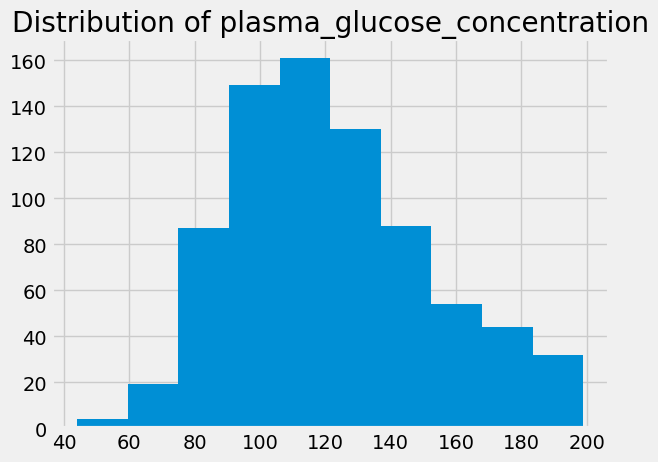

In [73]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

Scaling

In [81]:
scaler = StandardScaler()

# We use extra [] to change the column to df.
glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])

# mean is 0, std is 1.
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

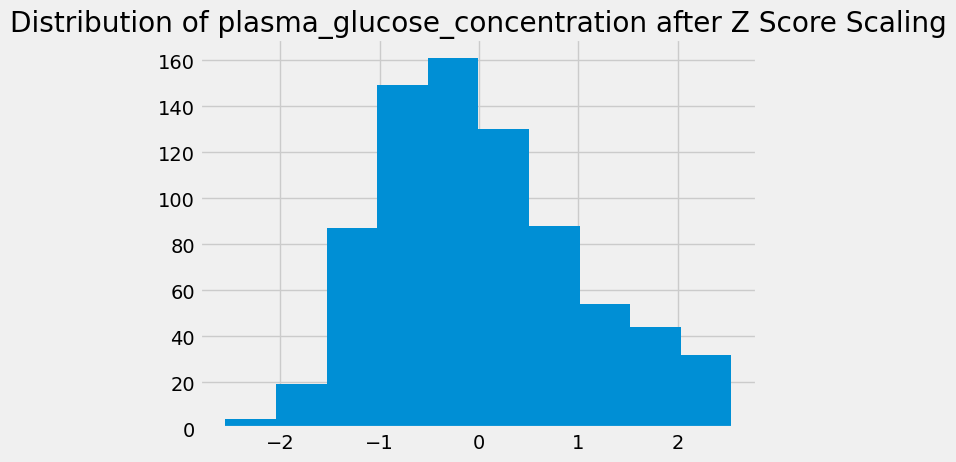

In [83]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

We scaled the x scale in above. We can do bulk operation as below.

array([[<Axes: title={'center': 'times_pregnant'}>,
        <Axes: title={'center': 'plasma_glucose_concentration'}>,
        <Axes: title={'center': 'diastolic_blood_pressure'}>],
       [<Axes: title={'center': 'triceps_thickness'}>,
        <Axes: title={'center': 'serum_insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree_function'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'onset_diabetes'}>]], dtype=object)

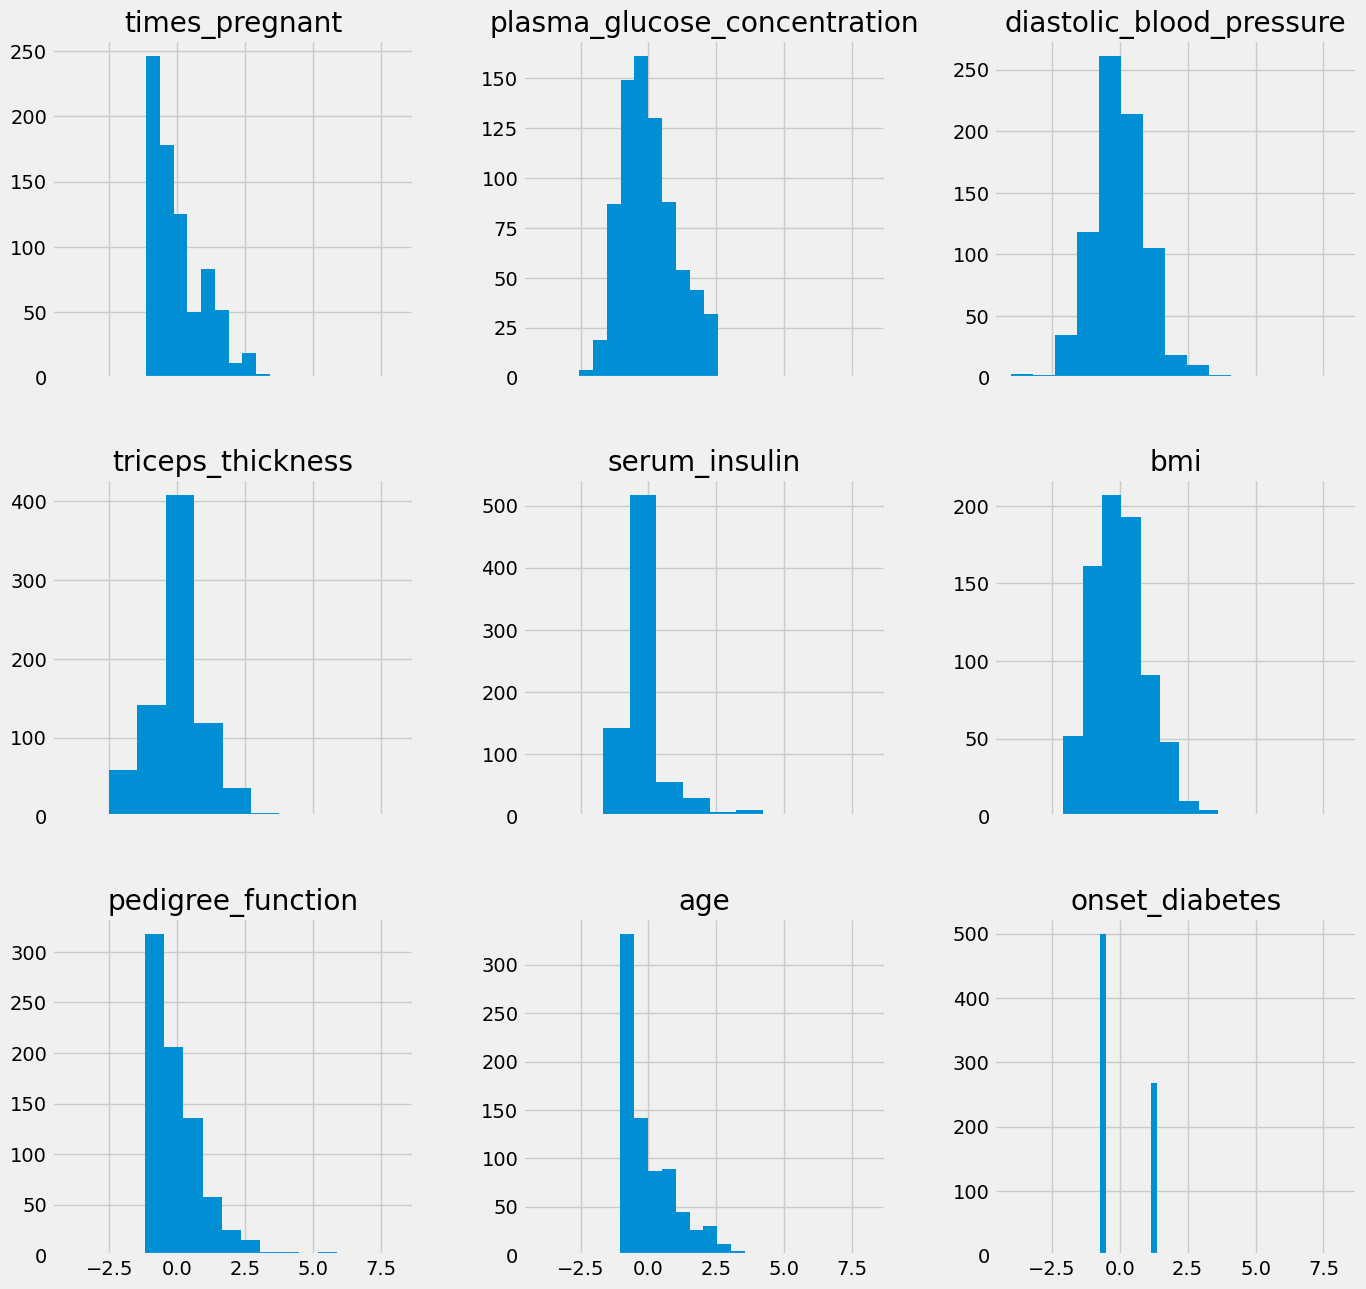

In [85]:
scale = StandardScaler()

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

Now we use it in pipeline.

In [87]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


# Min Max scaling

new_value = (old - column_min) / (column_max - column_min)

In [88]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)

pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Weight of outliers will be lower in min-max scaling, this might be a disadvantage.

In [90]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X,y)

print(grid.best_score_, grid.best_params_)

0.7630336983278159 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


# Row normalization

We think that every row is a vector in the area:<br>
x = (x1, x2, ... , xn)<br>
||x|| = sqrt(x1^2 + x2^2 + ... + xn^2))<br>
We calculate the distance of them, it is a L2 Norm.<br>

In [91]:
np.sqrt((pima_imputed**2).sum(axis=1)).mean()

223.36222025823747

In [92]:
from sklearn.preprocessing import Normalizer

normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)

np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0

After normalized, all rows have the L2-value of 1.

In [93]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', SimpleImputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7006111535523301 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


Row normalize not so good in this case.